In [33]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from scipy import sparse
import time
from sklearn import svm
import matplotlib.pyplot as plt

In [34]:
# input file path
filename = r'D:\wkspacePY\STA 141C\data\processed.csv'

In [35]:
# load and split data
df = pd.read_csv(filename, index_col='shot_id')

In [36]:
# training set
# X: training matrix
# Y: true label of training matrix
# test set
# test_X: test matrix
# test_Y: true label of test matrix
Y = df['shot_made_flag']
X = df.drop(['shot_made_flag'], axis=1)
Y = Y.as_matrix()
Y = Y.reshape(Y.shape[0],1)
X = X.as_matrix()
# max_X = np.array([np.linalg.norm(X[:, i]) for i in range(X.shape[1])]).reshape(1, X.shape[1])
max_X = np.array([np.max(X[:, i]) for i in range(X.shape[1])]).reshape(1, X.shape[1])
X, test_X, Y, test_Y = train_test_split(X, Y, test_size=0.2)

In [37]:
# Normalize
X /= max_X
test_X /= max_X

In [38]:
## hyper parameters
# number of training data
N, D = X.shape
# number of test data
n, d = test_X.shape
Lamda = 1
# number of iteration
# iter = 5000
# threshold
epsilon = 0.001
# learning_rate
learning_rate = 1.0 * 10 ** (-3)
# estimated value for Y
Yhat = []
# value of cost function in each iteration
costs = []

In [39]:
# logistic
# scikit-learn implement
# import the LogisticRegression  
from sklearn.linear_model import LogisticRegression    
classifier = LogisticRegression() 
classifier.fit(X, Y) 
predict = classifier.predict(X)
tmp = np.array([(Y[i]==predict[i]).astype('int') for i in range(n)])
print("training accuracy: %f" % float(len(np.where(tmp > 0)[0])/n))
predict_Y = classifier.predict(test_X)
tmp = np.array([(test_Y[i]==predict_Y[i]).astype('int') for i in range(n)])
print("test accuracy: %f" % float(len(np.where(tmp > 0)[0])/n))

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training accuracy: 0.683463
test accuracy: 0.685019


Auc_train: 0.6978372283534355
Auc_test: 0.6970268611078911
AUC of training set0.697837
AUC of test set0.697027


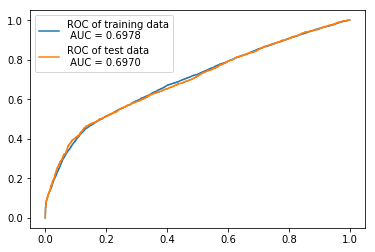

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
train_probs = classifier.predict_proba(X)[:,1]
test_probs = classifier.predict_proba(test_X)[:,1]
auc_train = roc_auc_score(Y, train_probs)
auc_test = roc_auc_score(test_Y, test_probs)
print('Auc_train: {}'.format(auc_train))
print('Auc_test: {}'.format(auc_test))
roc_train = roc_curve(Y, train_probs)
roc_test = roc_curve(test_Y, test_probs)
auc_train = auc(roc_train[0], roc_train[1])
auc_test = auc(roc_test[0], roc_test[1])
plt.plot(roc_train[0], roc_train[1], label = 'ROC of training data\n AUC = {:.4f}'.format(auc_train))
plt.plot(roc_test[0], roc_test[1], label = 'ROC of test data\n AUC = {:.4f}'.format(auc_test))
plt.legend()     
plt.savefig(r'D:\wkspacePY\STA 141C\picture\logistic_ROC.png', ppi = 600)
print("AUC of training set%lf"%auc_train)
print("AUC of test set%lf"%auc_test)

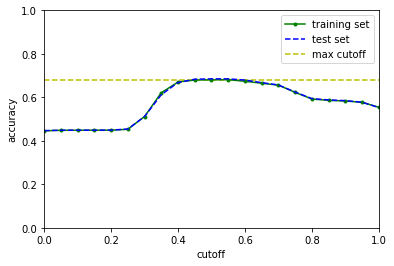

In [100]:
submission_binary_train=classifier.predict_proba(X)[:,1]
submission_binary_test=classifier.predict_proba(test_X)[:,1]
acc_train =[]
acc_test = []
for i in np.linspace(0, 1, num=21):
    Y_pred=np.array([j>i for j in submission_binary_train]).astype('int')
    Y_test_pred=np.array([j>i for j in submission_binary_test]).astype('int')
    acc_train.append(accuracy_score(Y, Y_pred.reshape(Y_pred.shape[0],1)))
    acc_test.append(accuracy_score(test_Y,Y_test_pred.reshape(Y_test_pred.shape[0],1)))

plt.plot(np.linspace(0, 1, num=21), np.array(acc_train),'.-g', label = "training set")
plt.plot(np.linspace(0, 1, num=21), np.array(acc_test),'--b', label = "test set")
plt.axis([0,1.0,0,1.0])

indice = np.argmax(np.array(acc_train))
max_cutoff = acc_train[indice]
plt.hlines(max_cutoff,color = 'y',linestyle = '--', xmin = 0, xmax = 1, label = "max cutoff")

plt.xlabel("cutoff")
plt.ylabel("accuracy")
plt.legend()
plt.savefig(r'D:\wkspacePY\STA 141C\picture\logistic_cutoff.png', ppi = 600)

In [14]:
# logistic
# scikit-learn implement
from sklearn.metrics import roc_curve, auc 
fpr, tpr, thresholds = roc_curve(test_Y,predict_Y)

Area under the ROC curve : 0.661050
accuracy of prediction: 0.545914


D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


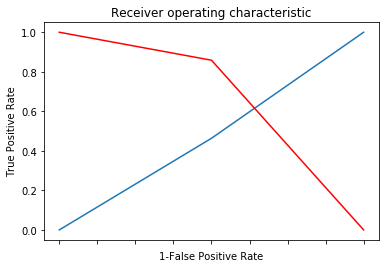

In [15]:
# logistic
# scikit-learn implement
# AUC and ROC
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]
# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])
# error matrix
cm = confusion_matrix(test_Y, predict_Y)
# cutoff value 
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(thresholds, index=i)})
roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]
cutoff = list(roc_t['threshold'])[0]
predict_Y = [i>cutoff for i in test_Y]
tmp = np.array([(test_Y[i]==predict_Y[i]).astype('int') for i in range(n)])
print("accuracy of prediction: %f" % float(len(np.where(tmp > 0)[0])/n))

In [121]:
# logistic
# scikit-learn implement
# print error matrix
cm

array([[2841,    0],
       [2299,    0]], dtype=int64)

In [120]:
# svm
# training
start_time = time.time()
# kernel = 'rbf', 'linear', 'poly'
clf = svm.SVC(kernel = 'rbf')
clf.fit(X, Y)
end_time = time.time()
print("SVM training time consumed: %lf secs" % (end_time - start_time))

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM training time consumed: 94.198561 secs


In [121]:
# svm
# predict
predict_train = clf.predict(X)
predict_test = clf.predict(test_X)

In [122]:
# svm
# accuracy
predict_train = predict_train.reshape(N,1)
predict_test = predict_test.reshape(n,1)
tmp = np.array([(Y[i]==predict_train[i]).astype('int') for i in range(N)])
print("training accuracy: %f" % float(len(np.where(tmp > 0)[0])/N))
tmp = np.array([(test_Y[i]==predict_test[i]).astype('int') for i in range(n)])
print("test accuracy: %f" % float(len(np.where(tmp > 0)[0])/n))

training accuracy: 0.672958
test accuracy: 0.679767


In [43]:
# logistic
# apply this function to each element in the matrix
def f(x):
    return 1/(1+np.exp(x))

In [44]:
# logistic
# initialize vector of omega
w = np.random.randn(D)
w = np.matrix(w).T
print("shape of w:", w.shape, "type of w:", type(w))

shape of w: (116, 1) type of w: <class 'numpy.matrixlib.defmatrix.matrix'>


In [46]:
# logistic
start_time = time.time()
K = np.array(X@w) * np.array(Y)
K = -np.array(Y) * f(K)
result0 = X.T@K + Lamda * w
result0 = np.sqrt((result0.T @ result0)[0, 0])
while True:
    Yhat = X @ w
    delta = Yhat - Y
    K = np.array(X@w) * np.array(Y)
    K = -np.array(Y) * f(K)
    result = X.T@K + Lamda * w
    r = np.sqrt(result.T.dot(result)[0, 0])
    if r < epsilon * result0:
        print("Converge!")
        break
    # update coefficient vector w
    w = w - learning_rate * result
    # store the cost
    costs.append(r)
# print out optimized w vector
end_time = time.time()
print("final value of cost function:", costs[-1])
print("Logistic training time consumed: %lf secs" % (end_time - start_time))

Converge!
final value of cost function: 8.384418632008066
Logistic training time consumed: 2.327092 secs


In [47]:
# logistic
# accuracy
delta_train = np.array(X @ w) * np.array(Y)
print("accuracy of training: %f" % float(len(np.where(delta_train > 0)[0])/N))
delta_test = np.array(test_X @ w) * np.array(test_Y)
print("accuracy of prediction: %f" % float(len(np.where(delta_test > 0)[0])/n))

accuracy of training: 0.443450
accuracy of prediction: 0.457004
